# ISYE 601 - ML in action

#### Rohit Gautam
   <hr>
   
   <h1><center>Problem 1</center></h1>
  

In [2]:
#Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)



#this allows plots to be displayed in line
%matplotlib inline 

In [3]:
df1 = pd.read_csv("StateData.csv", encoding='latin-1')
df1.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,West


### Problem 1 -  1a

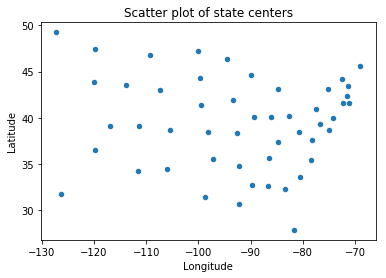

In [4]:
df1.plot.scatter(y='Latitude',x='Longitude')
plt.title('Scatter plot of state centers')
plt.show()

### Problem 1 -  1b

According to the plot the most southern state - Florida <br/>
No - geographically, Hawii is the most southern state

### Problem 1 -  2a

In [5]:
df2 = df1[df1.Frost == df1.Frost.min()]
df2

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
10,868,4963,1.9,73.6,6.2,61.9,0,6425,-126.25,31.75,West


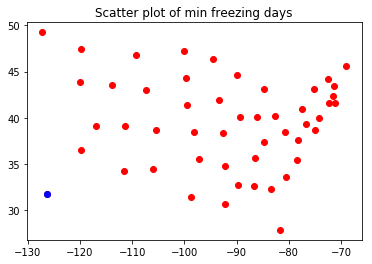

In [6]:
plt.scatter(y=df1['Latitude'],x=df1['Longitude'],c='red')
plt.scatter(y=df2['Latitude'],x=df2['Longitude'],c='blue')
plt.title('Scatter plot of min freezing days')
plt.show()

#### Therefore the state with Lat = 31.75 & Long = -126.25 (Hawii) has the lowest average days below freezing.
#### With number of days below freezing = 0.

### Problem 1 -  2b

In [7]:
df1_temp = df1.groupby('Region').mean().copy()
df1_temp[df1_temp['HighSchoolGrad'] == df1_temp['HighSchoolGrad'].max()].index.tolist()

['West']

Therefore the region with the highest average high school graduation rate is West region

### Problem 1 -  2c

In [8]:
df1['pop_educated'] = df1.Population * df1.HighSchoolGrad
df1_temp = df1.groupby('Region').sum()
# df1_temp['grad_rate'] = (df1_temp.pop_educated / df1_temp.Population) * 100

High school graduation rate in each region weighted by population is as below:

## The high school graduation rate in each region weighted by population:

In [9]:
print(df1_temp['pop_educated']/df1_temp.Population)

Region
North Central    53.716965
Northeast        53.006149
South            44.952587
West             62.211639
dtype: float64


### Problem 1 -  3a

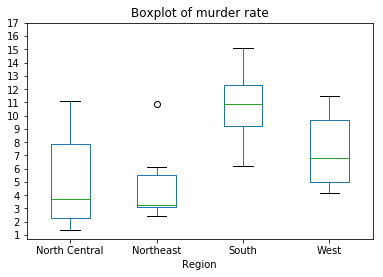

In [10]:
df1.boxplot('Murder',by='Region')
plt.suptitle("")
plt.title("Boxplot of murder rate")
plt.yticks(np.arange(1,18,1))
plt.grid(False)

 **Which region has the highest median murder rate?**
  <br>  Looking at the box plot above, looks like South has the highest median murder rate
 
 ### Problem 1 -  3b
 
  **Which region has the largest range (difference between max and min)?**
  <br>  North Central
 
 

In [14]:
#verifying by code
print("North Central: ",df1[df1.Region == 'North Central']['Murder'].max() - df1[df1.Region == 'North Central']['Murder'].min())
print("South: ",df1[df1.Region == 'South']['Murder'].max() - df1[df1.Region == 'South']['Murder'].min())
print("West: ",df1[df1.Region == 'West']['Murder'].max() - df1[df1.Region == 'West']['Murder'].min())
print("Northeast: ",df1[df1.Region == 'Northeast']['Murder'].max() - df1[df1.Region == 'Northeast']['Murder'].min())

North Central:  9.7
South:  8.899999999999999
West:  7.3
Northeast:  8.5


 ### Problem 1 -  4a

In [10]:
df_clean = df1[['Population', 'Income', 'Illiteracy', 'Murder', 'HighSchoolGrad', 'Frost', 'Area']]

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df_clean,df1.LifeExp)

In [12]:
coeff_df = pd.DataFrame(reg.coef_, df_clean.columns, columns=['Coefficient'])  
coeff_df = coeff_df.round(5)

**What is the regression equation?** <br>
Regression equation is as below


In [13]:
eqn = str(reg.intercept_)
for index, row in coeff_df.iterrows():
    eqn = eqn + "\n + "+ "(" + format(coeff_df.loc[index,'Coefficient'],'f') +  ")" + ' * ' + index
    
print("regression equation:\n\n",eqn)

regression equation:

 70.94322411112941
 + (0.000050) * Population
 + (-0.000020) * Income
 + (0.033820) * Illiteracy
 + (-0.301120) * Murder
 + (0.048930) * HighSchoolGrad
 + (-0.005740) * Frost
 + (-0.000000) * Area


 ### Problem 1 -  4b
 
 **What is the interpretation of the coefficient for Income?**
 <br>
 Since coeff for income is -0.00002, it shows as income rises, life expectancy reduces! <br>
 However, since the coeff is really small (close to zero) the effect of this is negligible.
 It is weakly negatively correlated.

 ### Problem 1 -  4c

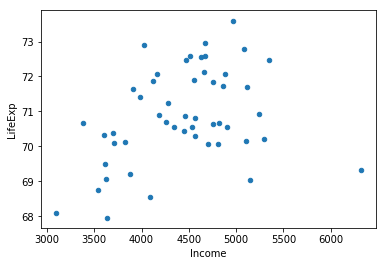

In [14]:
df1.plot.scatter('Income','LifeExp')

**Create a scatterplot with Income on the x-axis and LifeExp on the y-axis.<br> Does
this relationship agree with the coefficient?** <br>
Looking at the scatter plot above, we see positive correlation. <br>
This does not agree with the coef we saw above. <br>

**Why or why not?**<br>
This is possible have multiple predictor variables. It is just possible to obtain a positive slope for a single predictor variable, which turns negative when you include more predictors. This is due to the interaction effects between different features.

 ### Problem 1 -  4d

**(d) What is the interpretation of the coefficient for Murder?** <br>
Strong negative correlation.
The coeff of murder is -0.301120, as expected, as murder rate increases, the life expectancy decreases.
Or in other words, for every unit increase in murder rate per 100,000 population, the avg life exp goes down by 0.30112 yrs


 ### Problem 1 -  5a

In [15]:
df_clean = df1[[ 'Murder', 'HighSchoolGrad', 'Frost']]

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df_clean,df1.LifeExp)

coeff_df = pd.DataFrame(reg.coef_, df_clean.columns, columns=['Coefficient'])  
coeff_df = coeff_df.round(5)

eqn = str(reg.intercept_)
for index, row in coeff_df.iterrows():
    eqn = eqn + "\n + "+ "(" + format(coeff_df.loc[index,'Coefficient'],'f') +  ")" + ' * ' + index
    
print("regression equation:\n\n",eqn)

regression equation:

 71.0363788126198
 + (-0.283070) * Murder
 + (0.049950) * HighSchoolGrad
 + (-0.006910) * Frost


**What can you say about cold weather and life expectancy?** <br>
The colder the weather, the lower the life expectancy.
For every 1 day increase in average cold weather, the life expectancy goes down by 0.0069 yrs

**Do you agree? Why or why not?** <br>
Yes, this is agreeable, usually cold weather makes it hard for old people.

 ### Problem 1 -  5b

In [16]:
frost_range = df1.Frost.max() - df1.Frost.min()
print("frost range = ", df1.Frost.max())

frost range =  188


In [17]:
LifeExp_frost_range = -0.006910 * frost_range
print("Years of LifeExp equal to the range of frost =",LifeExp_frost_range)

Years of LifeExp equal to the range of frost = -1.29908


<h1><center>Problem 2</center></h1>

In [98]:
df1 = pd.read_csv("SpeciesData.csv", encoding='latin-1')
df1.drop(['Soil15','WArawah'],axis=1,inplace=True) #to prevent singular matrix

#Scaling - MinMax regularization 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

df_scaled = df1.copy()
MMS = MinMaxScaler()
df_scaled = MMS.fit_transform(df1)
df_scaled = pd.DataFrame(df_scaled, columns = df1.columns)

#Fitting the model
col_name = df_scaled.columns.tolist()
col_name.remove('Target')



In [19]:
#for L1 regularizatioon
log_list = np.linspace(-4,4,10)
lambda_list = []
for i in log_list:
    lambda_list.append(10**i)
    
L1_auc = []
for i in lambda_list:
    all_AUC = []
    # prepare cross validation
    kfold = KFold(10, shuffle = True, random_state = 1)
    # enumerate splits
    for train, test in kfold.split(df_scaled):
        train_df = df_scaled.iloc[train,:]
        test_df = df_scaled.iloc[test,:]
        
        X_train = train_df[col_name]
        X_test = test_df[col_name]
        Y_train = train_df['Target']
        Y_test = test_df['Target']
        
        #Train regularized model
        RLRmodel = LogisticRegression(penalty='l1',C=(1/i),solver='liblinear',max_iter=100)
        RLRmodel.fit(X_train,Y_train)
        RLRpreds = RLRmodel.predict_proba(X_test).T[1]

        #Regularized model
        fprLR, tprLR, threshLR = roc_curve(Y_test, RLRpreds)
        roc_auc_LR= roc_auc_score(Y_test, RLRpreds)
        
        all_AUC.append(roc_auc_LR)
    L1_auc.append(all_AUC)
    print('lambda = {:.6f} '.format(i), sum(all_AUC)/len(all_AUC))



lambda = 0.000100  0.8322801941196849
lambda = 0.000774  0.8322882329996271
lambda = 0.005995  0.8322801585283187
lambda = 0.046416  0.8323185230168253
lambda = 0.359381  0.8324207847672767
lambda = 2.782559  0.831504340905807
lambda = 21.544347  0.825866024827809
lambda = 166.810054  0.8012466805340284
lambda = 1291.549665  0.5
lambda = 10000.000000  0.5


In [20]:
#for L2 regularizatioon
log_list = np.linspace(-4,4,10)
lambda_list = []
for i in log_list:
    lambda_list.append(10**i)
    
L2_auc = []
for i in lambda_list:
    all_AUC = []
    # prepare cross validation
    kfold = KFold(10, shuffle = True, random_state = 1)
    # enumerate splits
    for train, test in kfold.split(df_scaled):
        train_df = df_scaled.iloc[train,:]
        test_df = df_scaled.iloc[test,:]
        
        X_train = train_df[col_name]
        X_test = test_df[col_name]
        Y_train = train_df['Target']
        Y_test = test_df['Target']
        
        #Train regularized model
        RLRmodel = LogisticRegression(penalty='l2',C=(1/i),solver='lbfgs',max_iter=1000)
        RLRmodel.fit(X_train,Y_train)
        RLRpreds = RLRmodel.predict_proba(X_test).T[1]

        #Regularized model
        fprLR, tprLR, threshLR = roc_curve(Y_test, RLRpreds)
        roc_auc_LR= roc_auc_score(Y_test, RLRpreds)
        
        all_AUC.append(roc_auc_LR)
        
    L2_auc.append(all_AUC)
    print('lambda = {:.6f} '.format(i), sum(all_AUC)/len(all_AUC))



lambda = 0.000100  0.8322036733613327
lambda = 0.000774  0.8322149365663363
lambda = 0.005995  0.8322377409456159
lambda = 0.046416  0.8323166341207937
lambda = 0.359381  0.8323344805237408
lambda = 2.782559  0.8302277558452078
lambda = 21.544347  0.8156348317600519
lambda = 166.810054  0.7927158533455045
lambda = 1291.549665  0.7727168998373897
lambda = 10000.000000  0.7634197734929729


In [21]:
attempt using logiticregressioncv
#### IGNORE!!!
from sklearn.linear_model import LogisticRegressionCV


X = df_scaled[col_name]
Y = df_scaled['Target']

#Train regularized model
RLRmodel = LogisticRegressionCV(cv=10,penalty='l1',solver='liblinear',scoring = roc_auc_score, max_iter=1000).fit(X,Y)
RLRpreds = RLRmodel.predict_proba(X).T[1]




 ### Problem 2 -  1a

**Which model (L1 or L2) took longer to train? Why?** <br>
L1 takes longer to train. This is because there is a closed form solution for L2 (no closed form for L1)


 ### Problem 2 -  1c

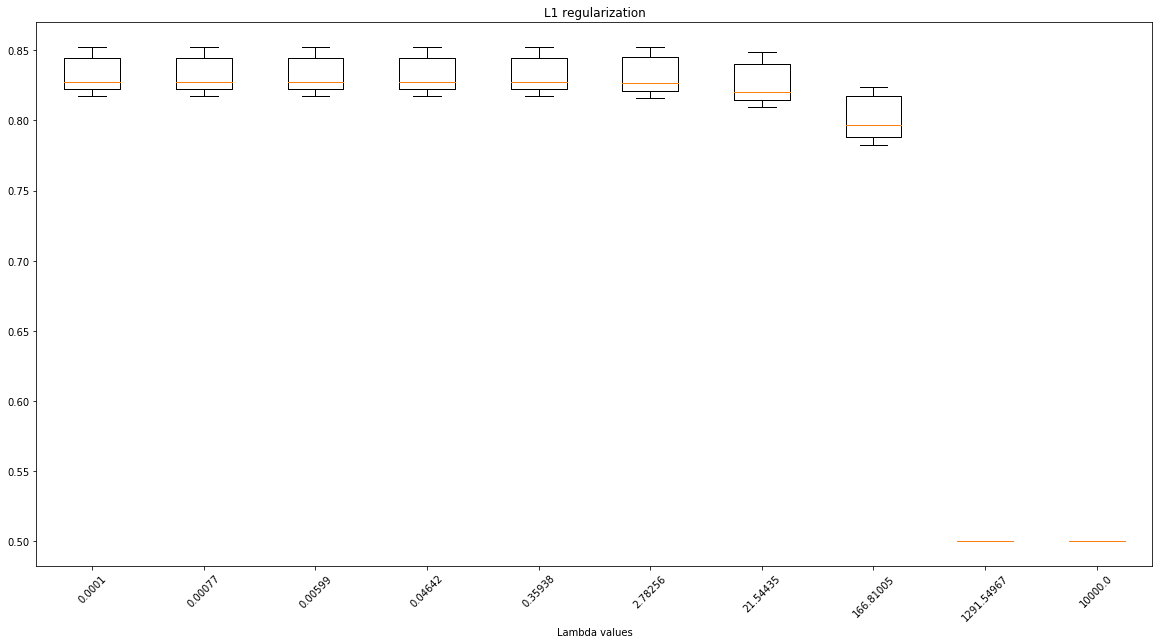

In [22]:
import matplotlib.pyplot as plt

rounded_list = [round(x,5) for x in lambda_list]

plt.figure(figsize=(20,10))
plt.title('L1 regularization')
plt.boxplot(L1_auc,labels=rounded_list)
plt.xticks(rotation=45)
plt.xlabel('Lambda values')
plt.show()

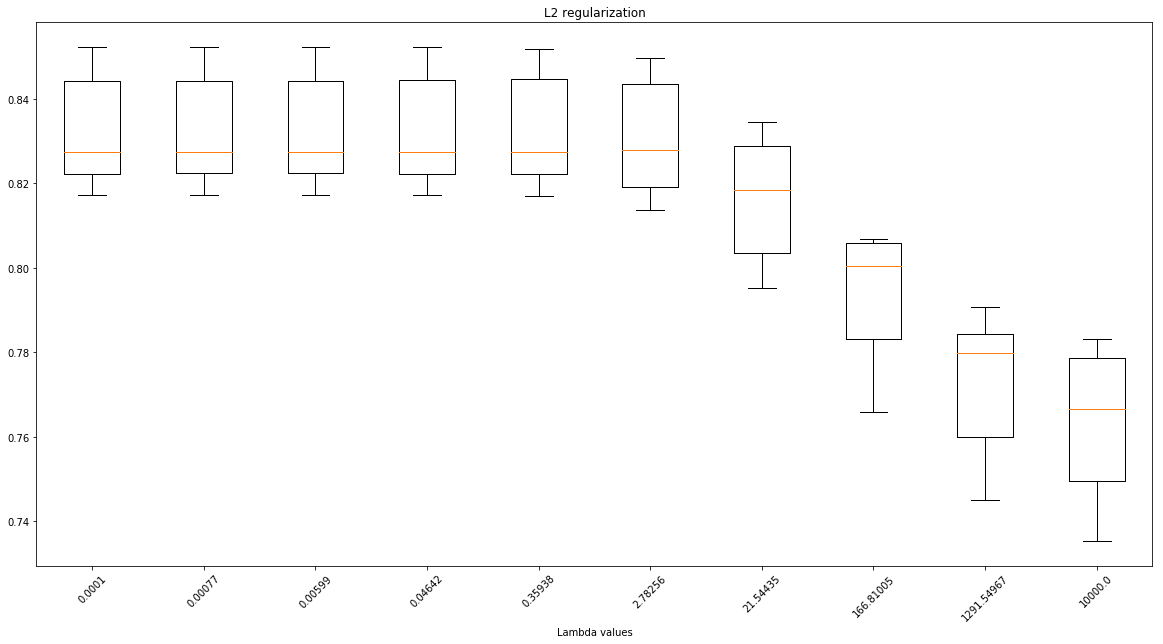

In [23]:
import matplotlib.pyplot as plt

rounded_list = [round(x,5) for x in lambda_list]

plt.figure(figsize=(20,10))
plt.title('L2 regularization')
plt.boxplot(L2_auc,labels=rounded_list)
plt.xticks(rotation=45)
plt.xlabel('Lambda values')
plt.show()

 ### Problem 2 -  1c

Best Lambda value for L1 is 0.359381   <br>
Best Lambda value for L2 is 0.359381  

 ### Problem 2 -  2a

In [24]:
from sklearn.model_selection import train_test_split

X = df1.drop('Target',axis=1)
Y = df1.Target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0 )

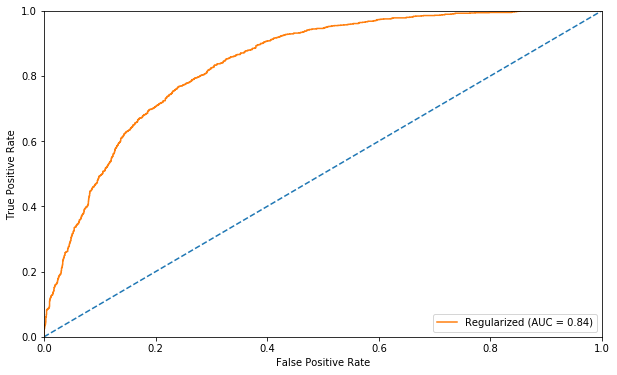

In [25]:
#model for l1
#best lambda value = 0.359381

#Train regularized model
RLRmodel = LogisticRegression(penalty='l1',C=(1/0.359381),solver='liblinear',max_iter=100)
RLRmodel.fit(X_train,Y_train)
RLRpredsL1 = RLRmodel.predict_proba(X_test).T[1]

#Regularized model
fprL1, tprL1, threshL1 = roc_curve(Y_test, RLRpredsL1)
roc_auc_L1= roc_auc_score(Y_test, RLRpredsL1)

#Plot and compare with the Q and D models
fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprL1, tprL1, label='Regularized (AUC = %0.2f)' % roc_auc_L1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()


C:\Users\leksh\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


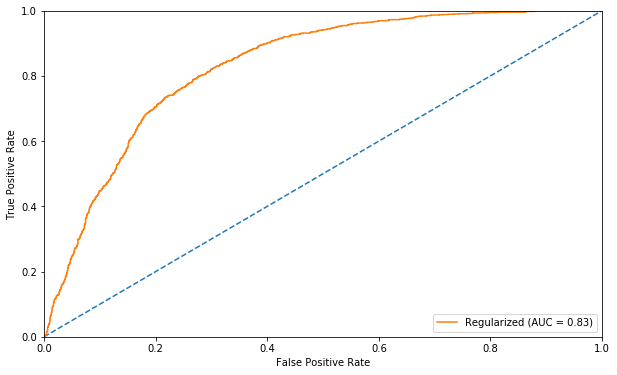

In [26]:
#model for l2
#best lambda value = 0.359381

#Train regularized model
RLRmodel = LogisticRegression(penalty='l2',C=(1/0.359381),solver='lbfgs',max_iter=1000)
RLRmodel.fit(X_train,Y_train)
RLRpredsL2 = RLRmodel.predict_proba(X_test).T[1]

#Regularized model
fprL2, tprL2, threshL2 = roc_curve(Y_test, RLRpredsL2)
roc_auc_L2= roc_auc_score(Y_test, RLRpredsL2)


#Plot and compare with the Q and D models
fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprL2, tprL2, label='Regularized (AUC = %0.2f)' % roc_auc_L2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()


####  We would prefer the L1 model since it has a higher AUC

 ### Problem 2 -  2b

In [27]:
#l1 model
for counter,value in enumerate(tprL1):
    if value >= 0.85:
        ctrL1 = counter
        break
        
print("corresponding fpr for L1 model is:",fprL1[ctrL1])
print("corresponding threshold for L1 model is:",threshL1[ctrL1])

corresponding fpr for L1 model is: 0.3260481712756467
corresponding threshold for L1 model is: 0.32231685753314004


In [28]:
#L2 model

for counter,value in enumerate(tprL2):
    if value >= 0.85:
        ctrL2 = counter
        break
        
print("corresponding fpr for L2 model is:",fprL2[ctrL2])
print("corresponding threshold for L2 model is:",threshL2[ctrL2])

corresponding fpr for L2 model is: 0.3376449598572703
corresponding threshold for L2 model is: 0.3031360692794923


 ### Problem 2 -  2c

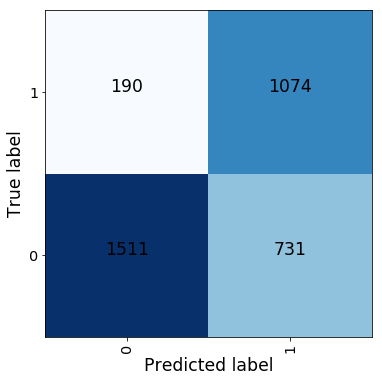

In [29]:
from sklearn.metrics import confusion_matrix

#l1 model
yhatLR1round = []
for i in RLRpredsL1:
    if i > threshL1[ctrL1]:
        yhatLR1round.append(1)
    else:
        yhatLR1round.append(0)
        
#Create a confusion matrix
cMatrix = confusion_matrix(y_true = Y_test, y_pred = yhatLR1round)
fig = plt.figure(figsize=(10, 6))
plt.imshow(cMatrix, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
plt.ylim([-0.5,1.5])
labels = ['0', '1']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

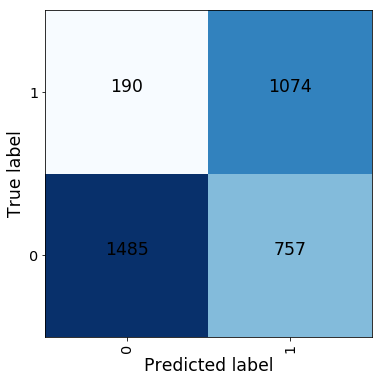

In [30]:
from sklearn.metrics import confusion_matrix

#l1 model
yhatLR2round = []
for i in RLRpredsL2:
    if i > threshL2[ctrL2]:
        yhatLR2round.append(1)
    else:
        yhatLR2round.append(0)
        
#Create a confusion matrix
cMatrix = confusion_matrix(y_true = Y_test, y_pred = yhatLR2round)
fig = plt.figure(figsize=(10, 6))
plt.imshow(cMatrix, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
plt.ylim([-0.5,1.5])
labels = ['0', '1']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

#### We prefer L1 model since it has a lower False negatives

<h1><center>Problem 3</center></h1>

### Problem 3 -1

Assumptions that will be violated are:
- Linear regression expects the output to be continuous with an error term that is normally distributed. If the output of a Linear regression is binary, it may violate the normality of error assumptions
- Logistic regression does not require a linear relationship between the dependent and independent variables, and this will violate Linear regressions linear relationship requirement

### Problem 3 - 2

 Logistic regression requires that the independent variables are linearly related to the log odds.
 Whereas linear regression requred that the independent variables are linearly related to dependent variables.
 
 The log(ODDS) will be a linear combination of the features

### Problem 3 - 3

Provide two assumptions of logistic regression that are identical to linear regression:
- Little or no multi-collinearity among the independent variables
- Logistic regression requires the observations to be independent of each other, that is, no correlation between them (weak exogenity)

<h1><center>Problem 4</center></h1>

### Problem 4 - 1

It is undesireable in explanation problems:
- Can make choosing the correct predictors to include more difficult.
- Interferes in determining the precise effect of each predictor

It is undesireable in prediction problems:
- Linear regression is helps us understant how the dependent variable changes for a unit change in independent variable (holding other variables constant). However, when variables are correlated, it makes it hard to change one variable without changing the other.
- They provide similar signals and same underlying relationship --> They can bias the regression coefficients

### Problem 4 - 2

Automated features to handle correlated features:
- L2 Regularization

<h1><center>Problem 5</center></h1>

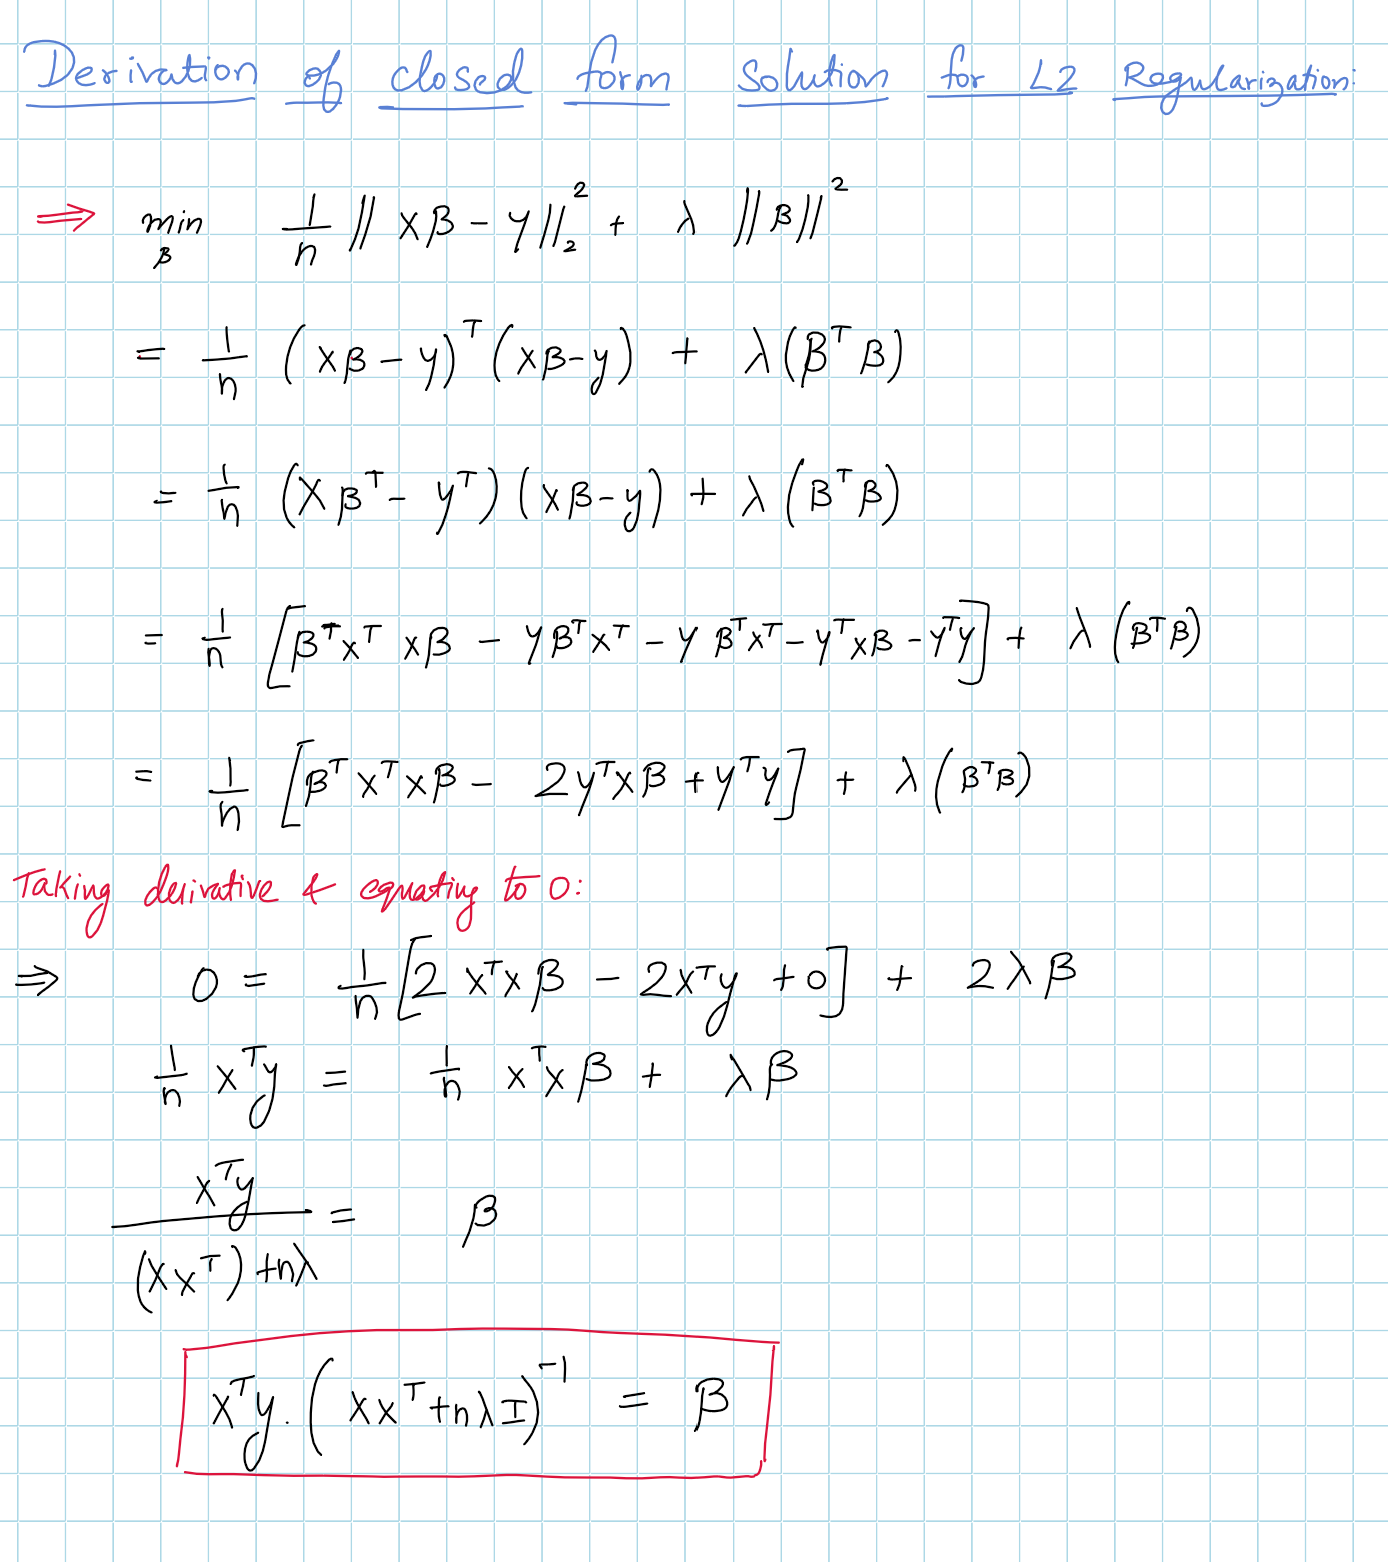

<h1><center>Problem 6</center></h1>

### Problem 6-1

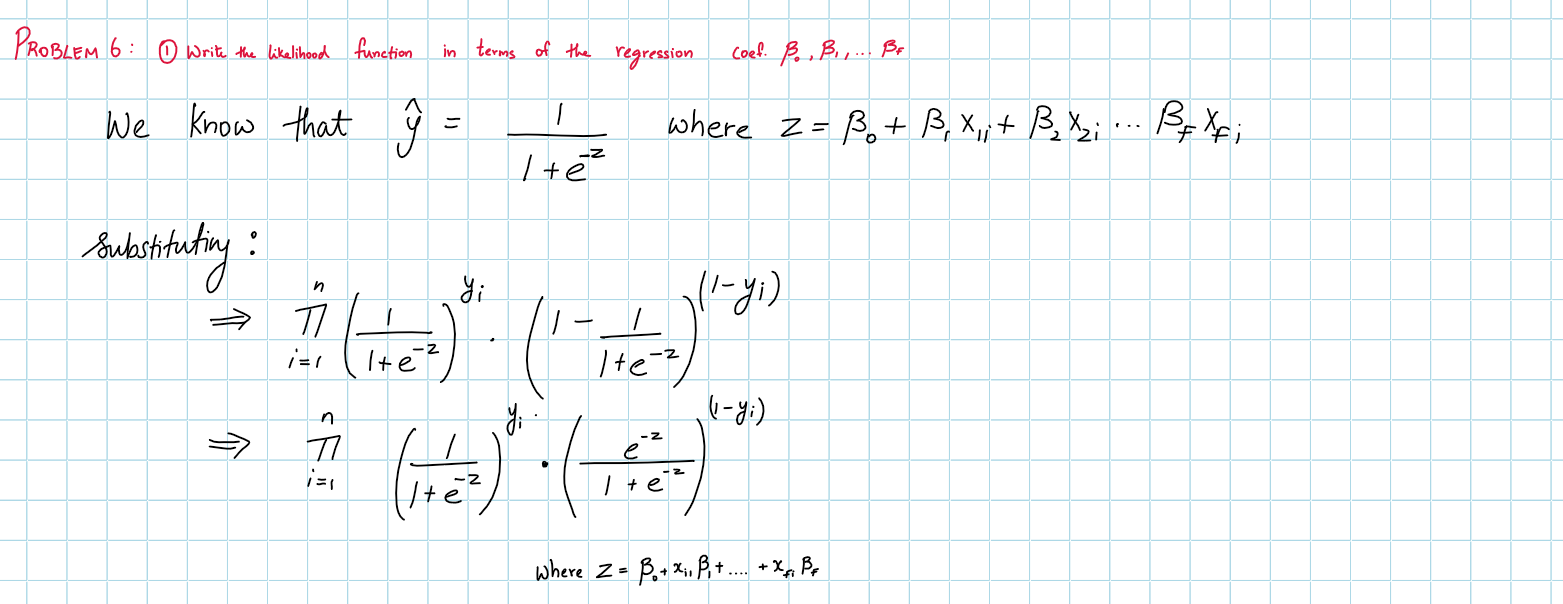

### Problem 6-2

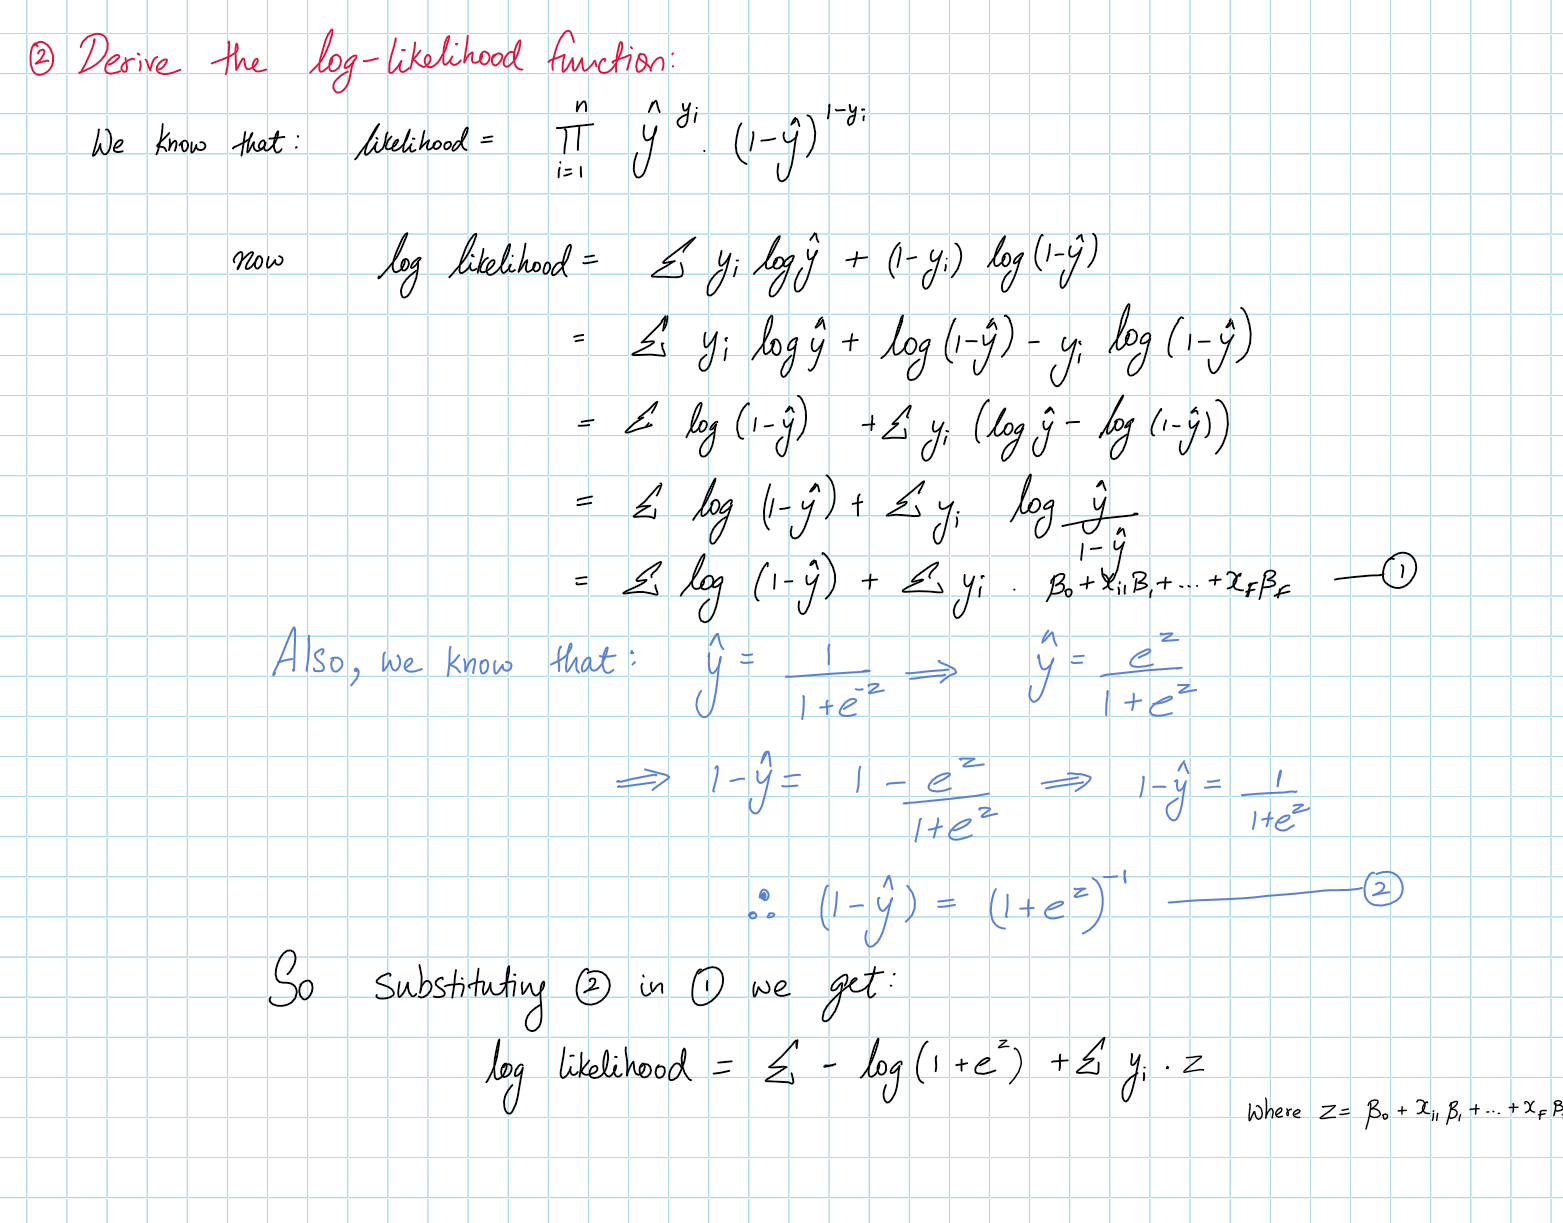

### Problem 6-3

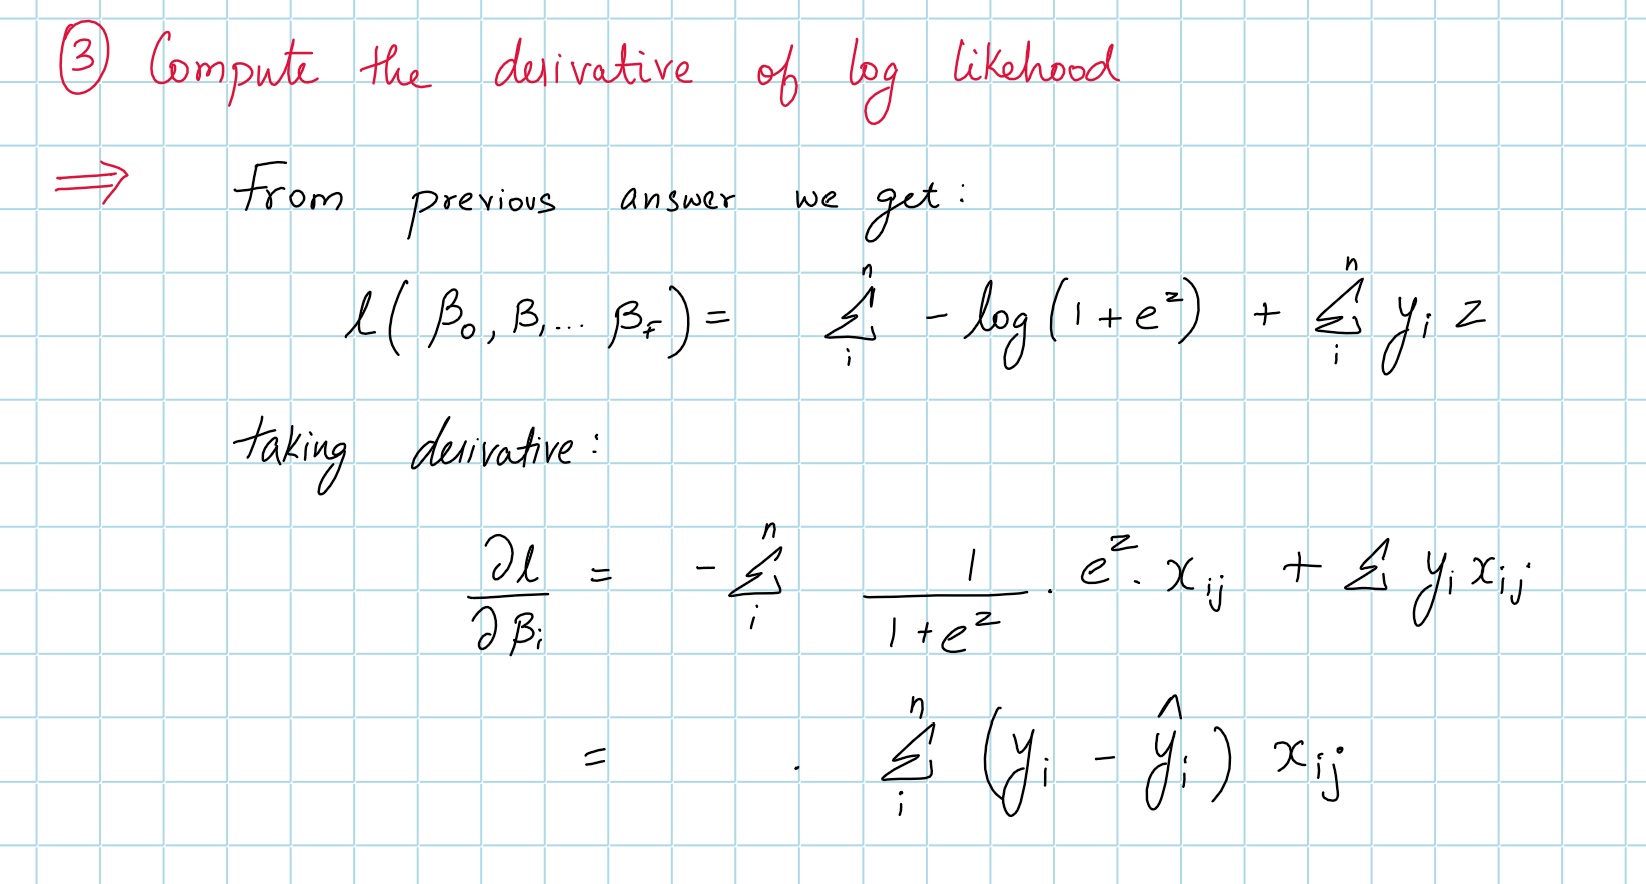

### Problem 6-4

#### Is there a closed form solution? Why?

No there is no closed form solution <br>
- After taking derivative, the equation becaomes a transcendtal equation, so we cannot take derivate and equate to zero to get closed form solution.